Summary of Exploratory Data Analysis (EDA)
This Exploratory Data Analysis (EDA) provides a comprehensive overview of the Titanic dataset to better understand the demographics and survival trends of the passengers. The goal of this analysis was to explore the data in terms of age distribution, gender, and survival outcomes, and to identify potential patterns that could explain who was more likely to survive the Titanic disaster. The following steps and key findings summarize the analysis:

Process:
Data Loading and Preparation:

The Titanic dataset was loaded, and necessary libraries such as Pandas, Matplotlib, Seaborn, and NumPy were imported for data manipulation and visualization.
Basic data cleaning was performed, including handling missing values and categorizing the data for analysis.
Age Distribution Analysis:

A histogram was plotted to visualize the distribution of passengers' ages.
Findings:
The age distribution of passengers shows a peak around 30 years of age.
The dataset features a bimodal distribution, with most passengers being in the 20–40 age range, and a smaller but noticeable group of children (ages 0–5).
Very few passengers were over the age of 60, indicating a younger population aboard the ship.
Gender vs. Survival:

A bar plot was created to analyze survival rates across genders.
Findings:
The survival rate for females was significantly higher than for males.
Most males did not survive the disaster (with over 400 males not surviving), while a large portion of females did survive.
This confirms that survival was influenced by gender, likely due to evacuation policies like "women and children first."
Key Insights:
Age Distribution: The majority of passengers were young to middle-aged, with fewer older individuals. The age distribution helps us understand the demographic makeup of the Titanic passengers.
Survival and Gender: Gender played a significant role in determining survival outcomes. Females had a much higher survival rate than males, possibly due to prioritization during rescue operations.
This EDA sets the foundation for further analysis, such as investigating other features like passenger class (Pclass) and fare amounts, which may also influence survival rates. The visualizations provide a clearer understanding of how different factors impacted survival, offering insights into the disaster’s outcomes.



In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


DATA

Lets start by reading into the titanic dataset


In [3]:
train=pd.read_csv("C:\\Users\\Administrator\\Downloads\\Titanic  Dataset.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EXPLATORY DATA ANALYSIS 

analyze and investigate the data 

In [5]:
#column names 
for i in train.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [6]:
#missing values 
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

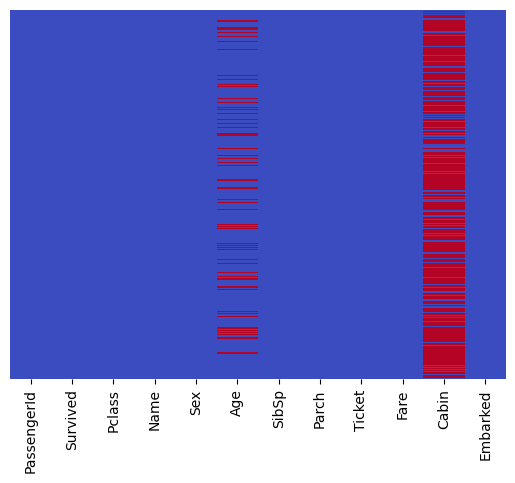

In [7]:
#heatmap to show the missing values 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

The dataset has missing values in Age and Cabin column. However, in age the nummber of missing values are less and will be replaced with mean while Cabin will be dropped later if we dont need it in the visualization 

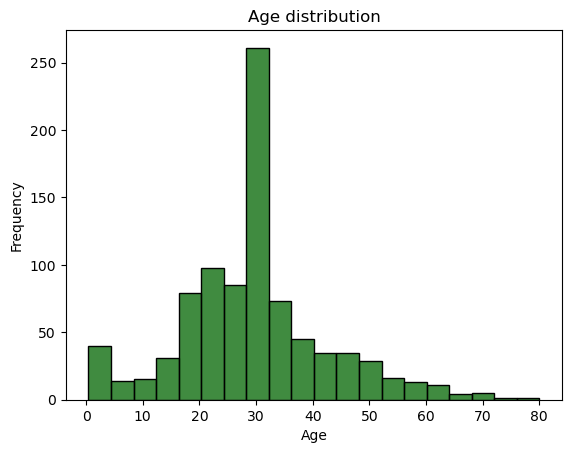

In [9]:
#Replace the missing values in age and show the distribution 
train['Age'].fillna(train['Age'].mean(), inplace=True)
sns.histplot(train['Age'],kde=False,color='darkgreen',bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()


This histogram visualizes the age distribution of passengers on the Titanic. Key observations include:

Peak around 30 years: The age group around 30 has the highest frequency, indicating that most passengers were in their early 30s.
Bimodal Distribution: There are two noticeable clusters of ages, one around the younger group (20–40) and a smaller peak around very young passengers (0–5).
Right-skewed: The distribution is slightly right-skewed, meaning there are fewer older passengers, with very few above the age of 60.
Wide Age Range: Passengers ranged from infants to around 80 years old.
This type of analysis helps us understand the age composition of the Titanic's passengers and could be further explored to check how age correlates with survival rates.

In [10]:
#checking for data types and info
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#checking for statistical summury 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#checking for duplicates
train.duplicated().sum()

0

In [13]:
#rows and columns in the dataset
print('number of row',(train.shape[0]))
print('number of columns',(train.shape[1]))

number of row 891
number of columns 12


In [14]:
#categorical and non categorical columns 
categorical_column=[]
non_categorical_column=[]
for column in train.columns:
    if train[column].dtype =='object' or train[column].dtype =='category':
        categorical_column.append(column)
    else:
        non_categorical_column.append(column)

print('categorical columns')
print(categorical_column)

print('\n non categorical columns ')
print(non_categorical_column)


categorical columns
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

 non categorical columns 
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


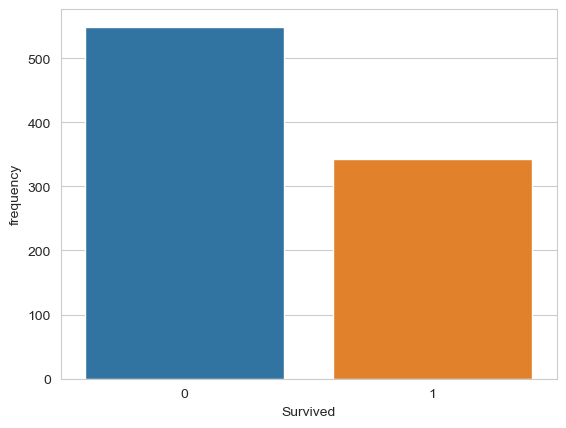

In [15]:
#show distribution of the survived 
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived')
plt.xlabel('Survived')
plt.ylabel('frequency')
plt.show()


From the fig,above the number of people are many above 500 compared to the ones who survived at slightly above 300

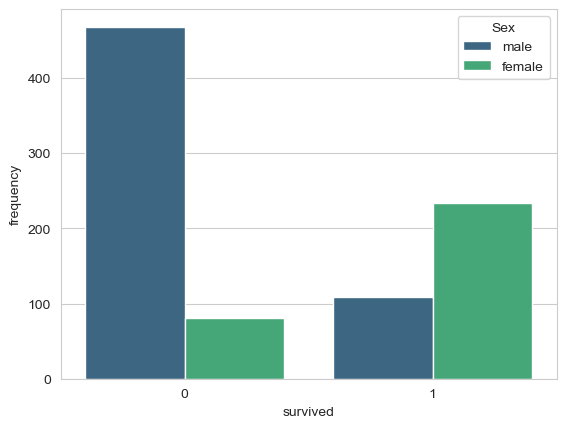

In [17]:
#The figure to show how people survived by sex
sns.set_style('whitegrid')
sns.countplot(data =train,x='Survived',hue='Sex',palette='viridis')
plt.ylabel('frequency')
plt.xlabel('survived')
plt.show()

Insights:
Survival rates differed greatly by gender. Most men did not survive, while a higher proportion of women survived. This reflects the common historical narrative that women and children were prioritized during evacuation (e.g., "women and children first"). The survival rate of females was much higher compared to males.
This analysis emphasizes that gender played a significant role in determining survival aboard the Titanic.

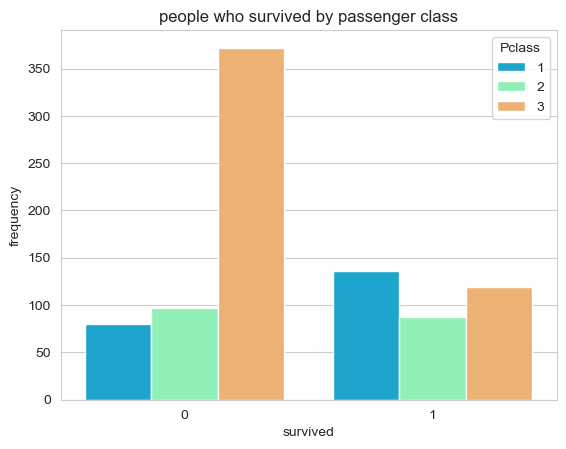

In [18]:
#The figure to show how people survived by passenger class 
sns.set_style('whitegrid')
sns.countplot(data =train,x='Survived',hue='Pclass',palette='rainbow')
plt.title('people who survived by passenger class')
plt.ylabel('frequency')
plt.xlabel('survived')
plt.show()

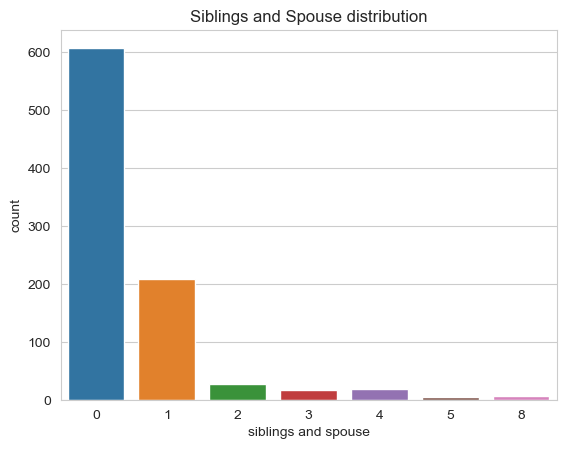

In [19]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='SibSp')
plt.title('Siblings and Spouse distribution')
plt.xlabel('siblings and spouse')
plt.ylabel('count')
plt.show()

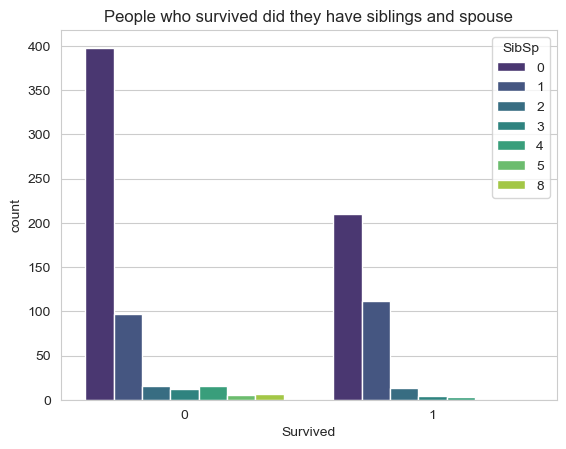

In [20]:
#people who survived did the have siblings or not 
sns.set_style('whitegrid')
sns.countplot(data=train,hue='SibSp',x='Survived',palette='viridis')
plt.title('People who survived did they have siblings and spouse')
plt.xlabel('Survived')
plt.ylabel('count')
plt.show()

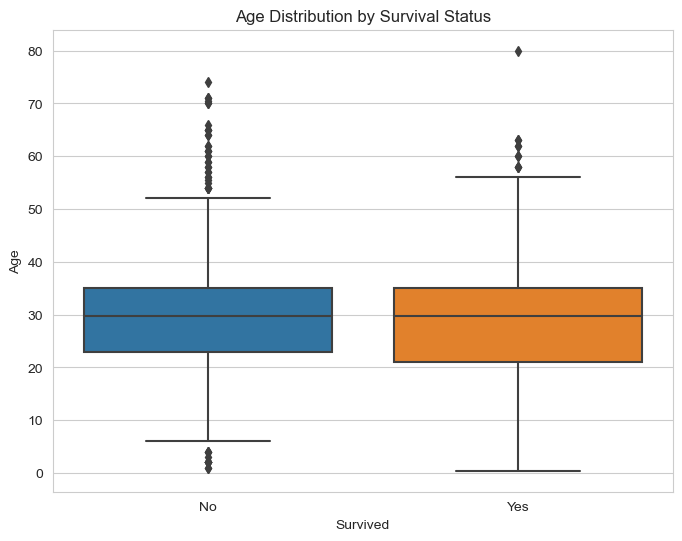

In [21]:
#age distribution by survival status
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Key Observations:

Median Age: The median age of survivors is slightly lower than that of non-survivors. This suggests that younger passengers were more likely to survive.
Age Distribution: The distribution of ages is skewed to the right for both survivors and non-survivors, indicating that a larger proportion of passengers were younger.
Outliers: There are a few outliers, particularly among older passengers who survived. These individuals might have had unique circumstances that contributed to their survival.
Possible Explanations:

"Women and Children First" Policy: The prioritization of women and children during the evacuation likely benefited younger passengers, regardless of their gender.
Physical Fitness: Younger passengers may have had greater physical strength and endurance, which could have helped them survive the ordeal.
Social Status: Younger passengers might have been more likely to be traveling with their families, which could have provided additional support and resources during the evacuation.

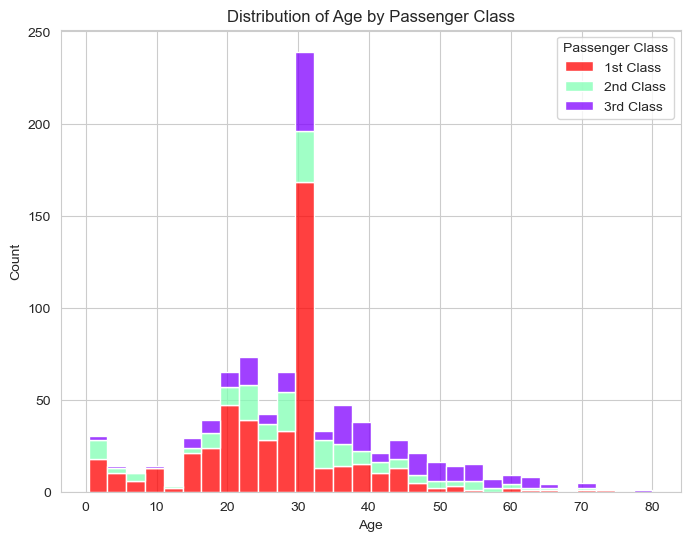

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=train, x='Age', hue='Pclass', multiple='stack', bins=30,palette='rainbow')
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Passenger Class', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()


Key Observations:

Age Distribution: The overall age distribution is skewed to the right, indicating that a larger proportion of passengers were younger.
Class Differences:
1st Class: Passengers in the first class tend to be older, with a significant number of passengers in the 30-40 age range.
2nd Class: The age distribution for second-class passengers is somewhat similar to the first class, but with a slightly younger skew.
3rd Class: A larger proportion of passengers in the third class are younger, with a peak in the 20-30 age range

Univariate Analysis
Analyze individual columns to understand their distribution.

Categorical Variables

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


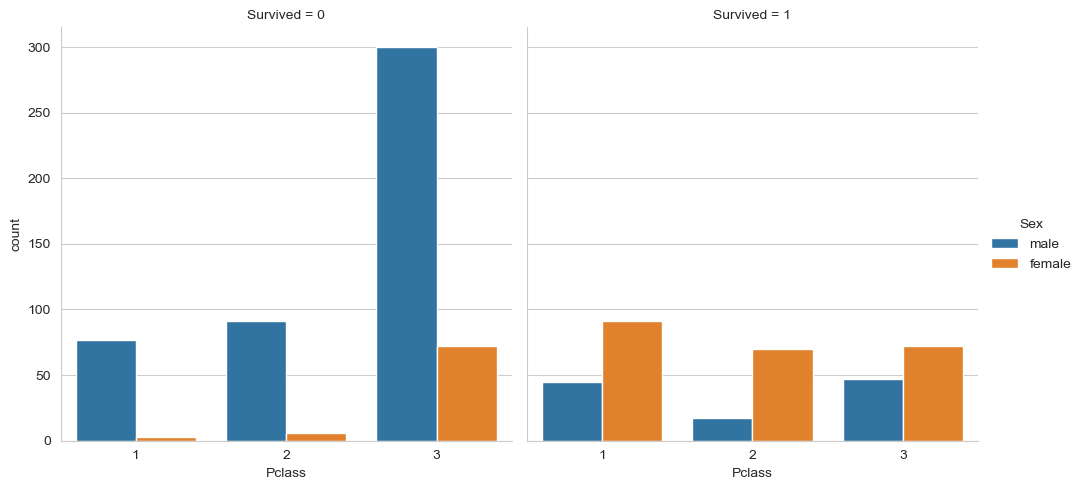

In [33]:
# Plot survival by gender and passenger class
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data= train)


Key Observations:

Passenger Class:
First Class: A higher proportion of passengers in the first class survived compared to those in second or third class.
Third Class: The majority of passengers in the third class perished.
Sex:
Female: Women were more likely to survive than men, especially in the first and second classes.
Male: Men had significantly lower survival rates, particularly in the third class.

<Axes: xlabel='Title', ylabel='count'>

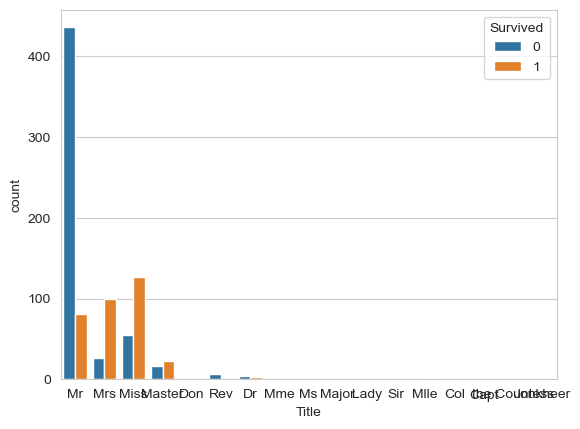

In [37]:
# Extract Title from Name
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Group by Title and plot
sns.countplot(x='Title', hue='Survived', data=train)


Prevalence of Titles: The most common titles are "Mr" and "Miss," followed by "Mrs." This reflects the social structure of the time, where men were more likely to travel alone or with their families, while women were often accompanied by their husbands or fathers.
Survival Rates by Title: The chart reveals significant differences in survival rates based on titles.
"Mrs." and "Miss": Women with these titles had significantly higher survival rates, likely due to the "women and children first" policy implemented during the evacuation.
"Mr.": Men with the "Mr." title had a lower survival rate, reflecting the societal norms of the time, where men were expected to prioritize the safety of women and children.
Other Titles: Titles like "Master" (young boys) and "Rev." (Reverend) also show a higher tendency to survive, possibly due to their age or social status.

<Axes: xlabel='FamilySize', ylabel='Survived'>

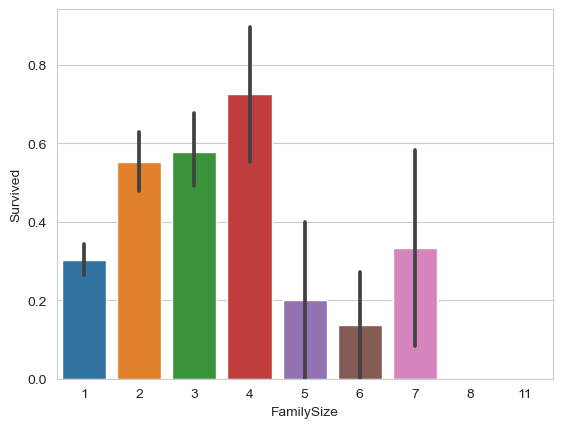

In [39]:
# Create a new feature 'FamilySize'
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Visualize its effect on survival
sns.barplot(x='FamilySize', y='Survived', data=train)


The bar graph illustrates the relationship between family size and survival rates. Each bar represents a specific family size, and the height of the bar corresponds to the proportion of individuals who survived within that family size.